In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

property = 'Temp_pre_7'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: -18.078; max value: 36.06785714


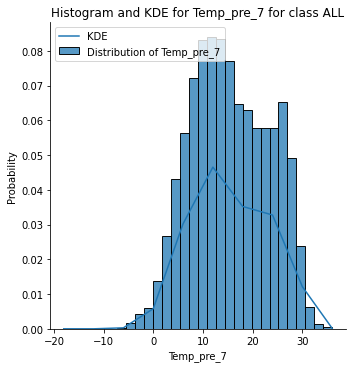

In [9]:
x = np.linspace(min_amount, max_amount, num=10)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 30)

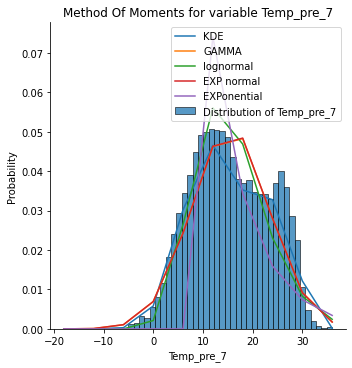

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9771601945608241, pvalue=7.725987411727761e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.111533140324901, pvalue=0)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9971501838602571, pvalue=7.066403182857665e-26), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.305373605878484, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9770287414563836, pvalue=8.182347019637141e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.1102751656384844, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)


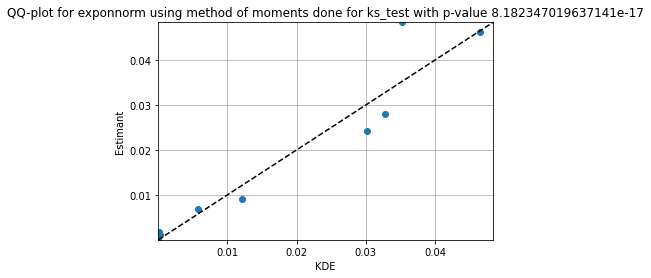

In [10]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

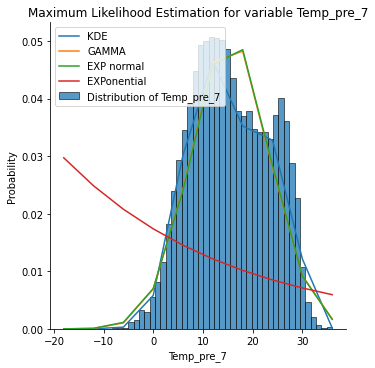

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9772374110398502, pvalue=7.468726509738616e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.1122687701033533, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9762669736707487, pvalue=1.1338646247503317e-16), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.1030277979614698, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5834503089363556, pvalue=0.0009178272227496568), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.9022471121232127, pvalue=0.0031340846085878837)


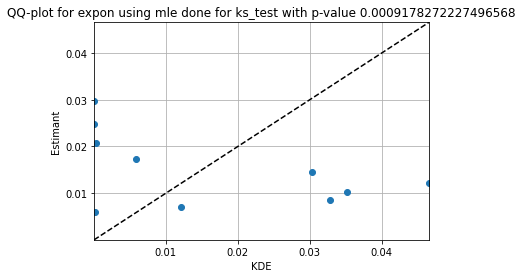

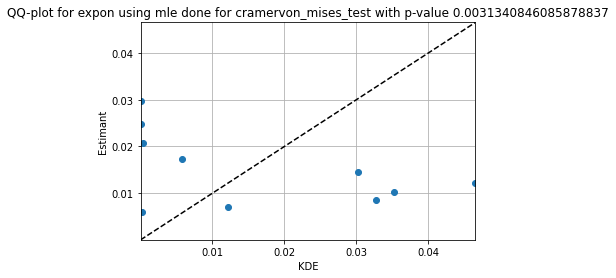

In [11]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[ 0.75188131 10.11939185  7.43955214]
[ 5.98682531 22.50503014  7.82773222]


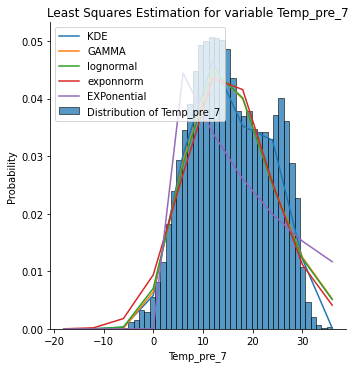

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9874707696451134, pvalue=1.9066629852897916e-19), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.2109466011473558, pvalue=0)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.983751524044169, pvalue=2.5654072426152205e-18), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.174925302841348, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9654602650873139, pvalue=4.8330356278360466e-15), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.001662091591387, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)


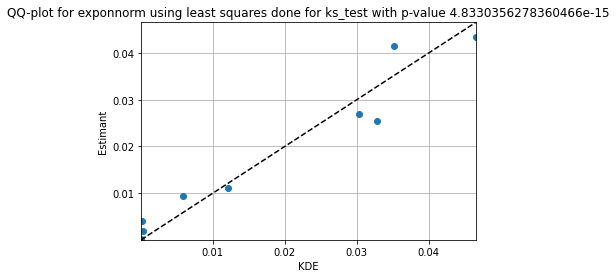

In [12]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

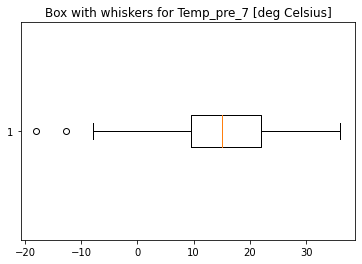

In [13]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} [deg Celsius]')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()